In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from skimage import color
import itertools as it
import math
import time

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
# For autotesting
%load_ext autoreload
%autoreload 2

In [3]:
def generate_gaussians(gaussians):
    return [helper.get_gaussian(*gaussian)[2] for gaussian in gaussians]

## Zwei Gaussians
Einer statisch, einer bewegt sich in jeder möglichen Richtung

In [4]:
size = 200

### Statischer Gaussian

In [5]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

In [6]:
gaussian_static = [x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size]

In [7]:
colorscheme_generator = color_schemes.create_color_brewer_colorscheme
colorscheme_names = ["red", "purple", "green", "orange", "blue'"]

In [8]:
colorschemes = [{"colorscheme": colorscheme_generator, "colorscheme_name": colorscheme_name} for colorscheme_name in colorscheme_names]

In [9]:
gaussians_2d = []
for mu_x, variance_x, mu_y, variance_y in it.permutations([-5, -2, 0, 2, 5, 10, 15],4):
    if not (variance_x < 0 or variance_y < 0 or variance_x == 0 or variance_y == 0) and not (mu_x > 4 or mu_y > 4) and not(mu_x < -2 or mu_y < -2):
        gaussians_2d.append([x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size])

In [10]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

var_x, var_y = [2,5,10,15,20], [15,20]
gaussians_2d = []
for i,mu_y in enumerate([-5,-2,0,2,5]):
    for j,mu_x in enumerate([-5,-2,0,2,5]):
        if mu_y > 0:
            variance_y = var_y[i-3]
            variance_x = var_x[j]
        else: variance_x = 5
        gaussians_2d.append([x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size])

In [11]:
gaussians_2 = []
for i in range(len(gaussians_2d)):
    gaussians_2.append([gaussian_static, gaussians_2d[i]])

In [12]:
### without c-implementation 23.721891164779663s elapsed size = 200
start = time.time()
images_2 = []
z_sums = []
for i in range(len(gaussians_2)):
    z_list, image, z_sum = picture_worker.generate_image(gaussians_2[i], colorschemes, color_space ="lab", use_c_implementation=True)
    images_2.append(image)
    z_sums.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

13.457228183746338s elapsed


['mu_x', 'variance_x', 'mu_y', 'variance_y']


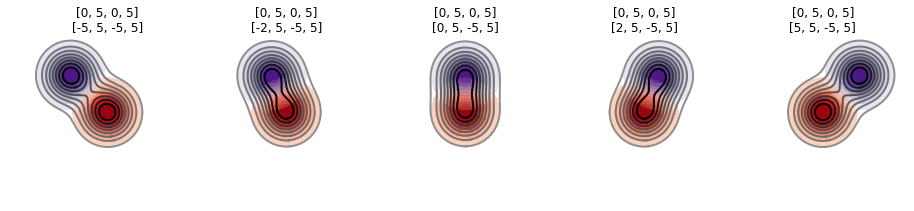

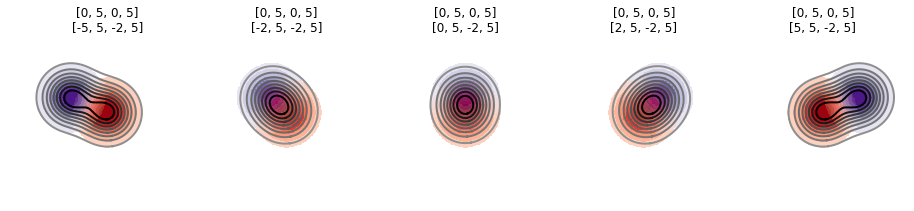

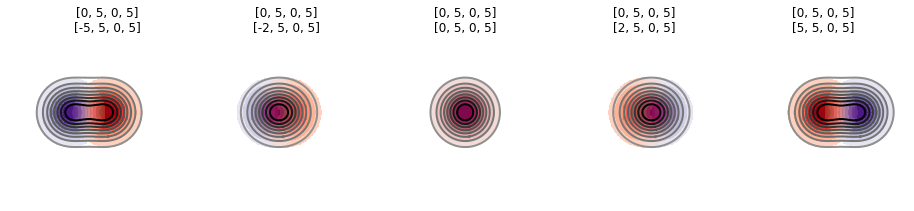

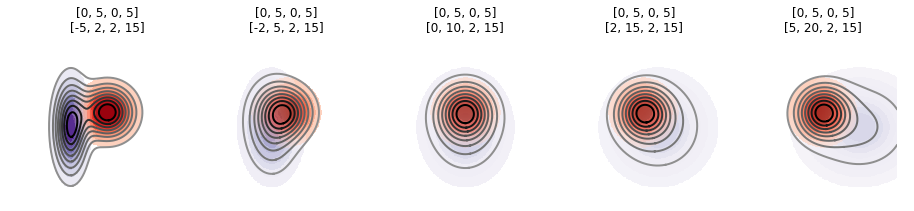

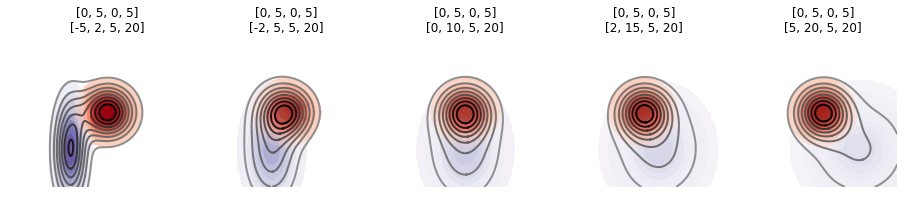

In [13]:
picture_worker.plot_images(images_2, gaussians_2, z_sums)

## Drei Gaussians
Einer statisch, zwei bewegen sich

In [14]:
gaussians_3 = []
for i,j in it.combinations(range(len(gaussians_2d)),2):
    gaussians_3.append([gaussian_static, gaussians_2d[i], gaussians_2d[j]])

In [15]:
### without c-implementation 113.0770411491394s elapsed size = 200
start = time.time()
images_3 = []
z_sums_3 = []
for i in np.linspace(0,len(gaussians_3)-1,dtype=int):
    z_list, image, z_sum = picture_worker.generate_image(gaussians_3[i], colorschemes, use_c_implementation=True, color_space ="lab")
    images_3.append(image)
    z_sums_3.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

41.14396286010742s elapsed


['mu_x', 'variance_x', 'mu_y', 'variance_y']


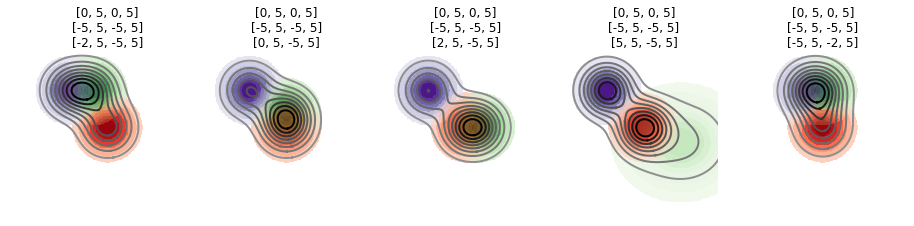

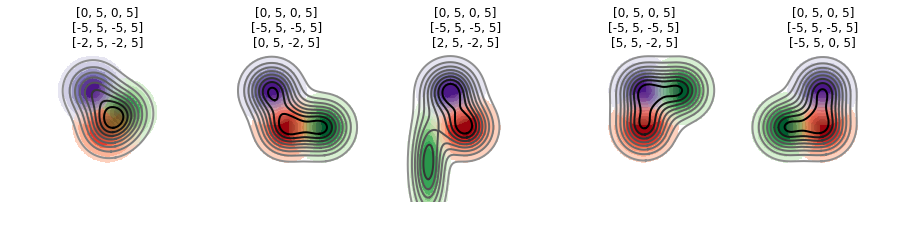

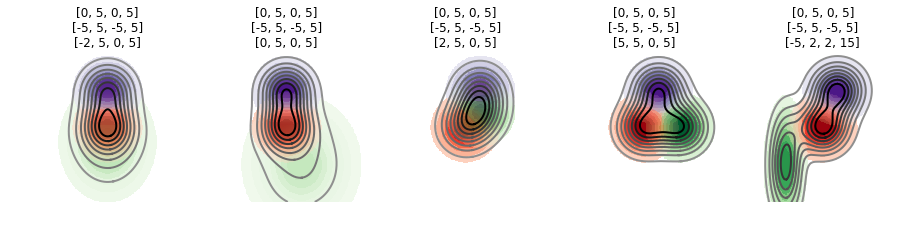

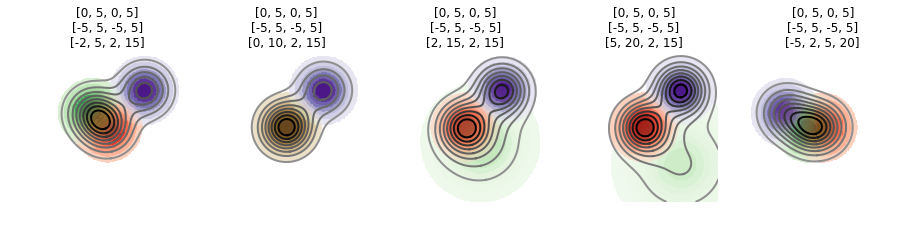

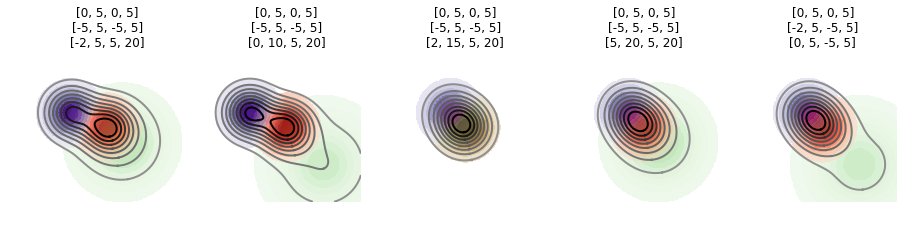

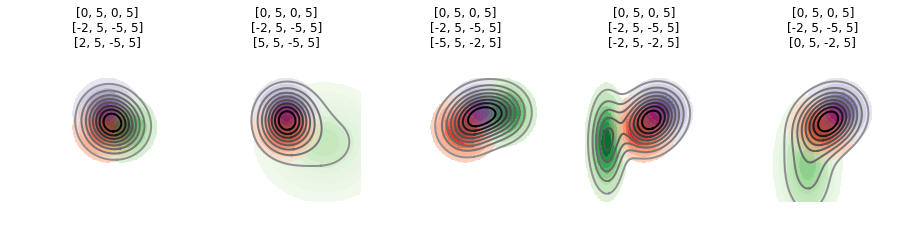

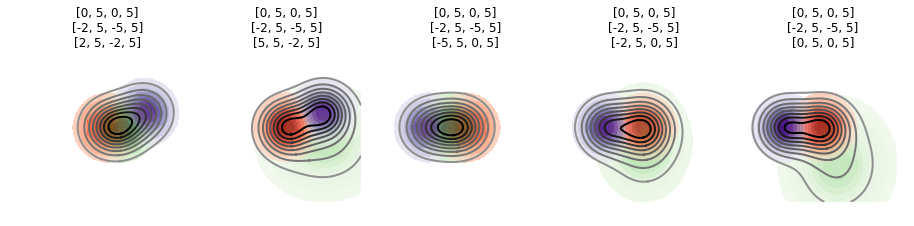

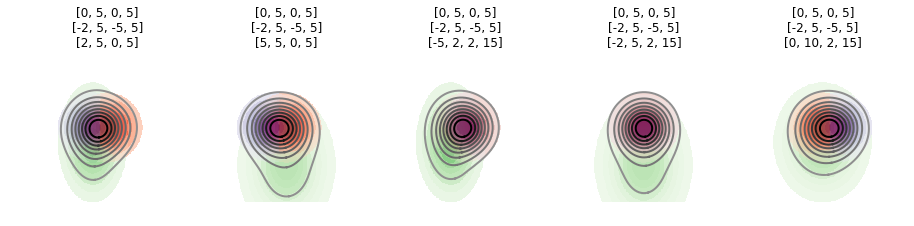

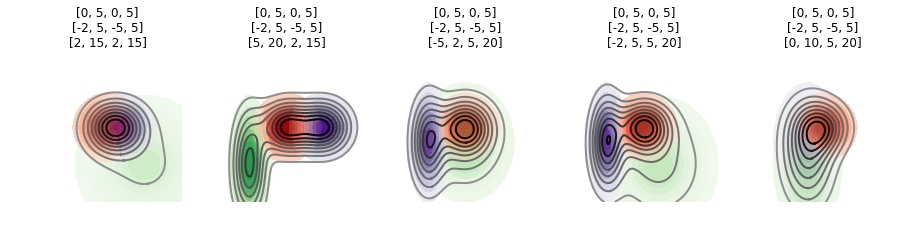

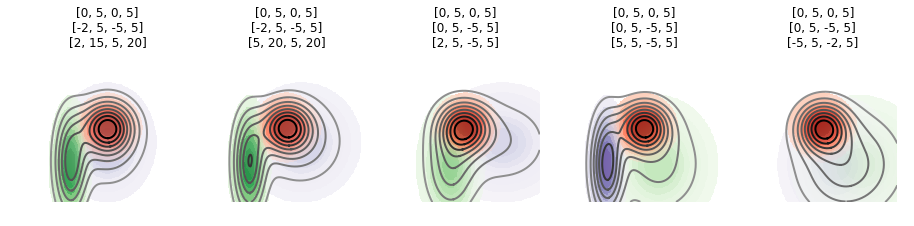

In [16]:
picture_worker.plot_images(images_3, gaussians_3, z_sums_3)

In [17]:
gaussians_3 = []
for i in range(len(gaussians_2d)):
    if i < math.ceil(len(gaussians_2d)/2):
        j = len(gaussians_2d)-i-1
    else:
        j = i-math.ceil(len(gaussians_2d)/2)
    gaussians_3.append([gaussian_static, gaussians_2d[i], gaussians_2d[j]])

In [18]:
images_3 = []
z_sums_3 = []
for i in range(len(gaussians_3)):
    z_list, image, z_sum = picture_worker.generate_image(gaussians_3[i], colorschemes, use_c_implementation=True, color_space ="lab")
    images_3.append(image)
    z_sums_3.append(z_sum)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


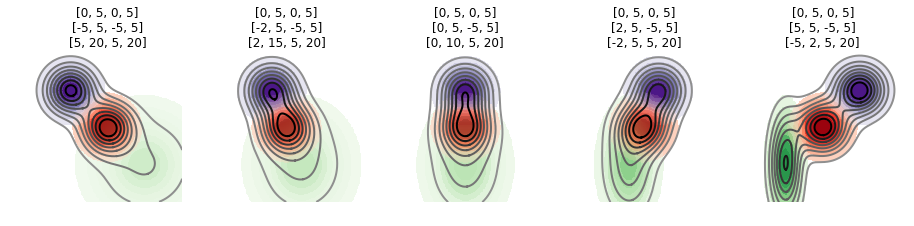

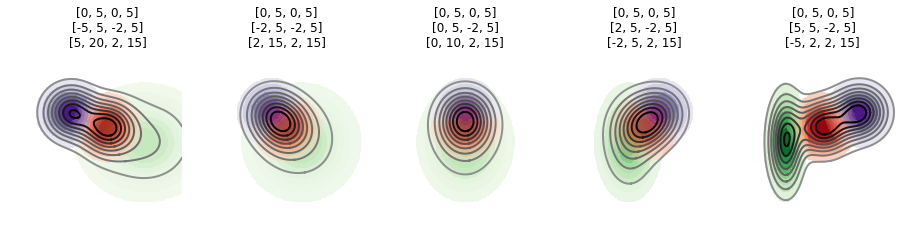

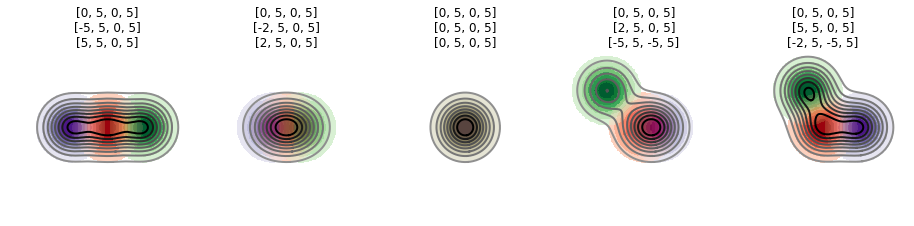

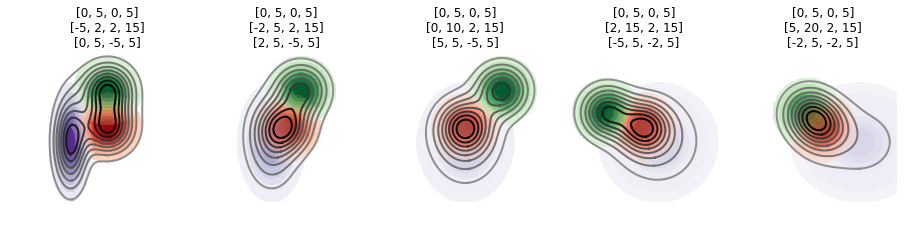

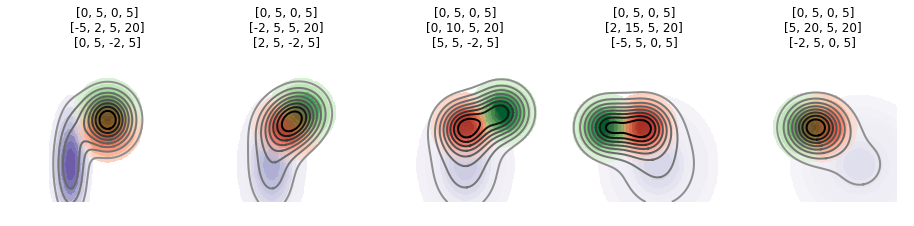

In [19]:
picture_worker.plot_images(images_3, gaussians_3, z_sums_3)

## Vier Gaussians
Einer Statisch, drei bewegen sich

In [20]:
gaussians_4 = []
for i,j,k in it.combinations(range(len(gaussians_2d)),3):
    gaussians_4.append([gaussian_static, gaussians_2d[i], gaussians_2d[j], gaussians_2d[k]])

In [21]:
### without c-implementation 165.8554539680481s elapsed size = 200
start = time.time()
images_4 = []
z_sums_4 = []
z_lists = []
for i in np.linspace(0,len(gaussians_4)-1,dtype=int):
    z_list, image, z_sum = picture_worker.generate_image(gaussians_4[i], colorschemes, use_c_implementation=True, color_space="lab")
    z_lists.append(z_list)
    images_4.append(image)
    z_sums_4.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

54.692482709884644s elapsed


['mu_x', 'variance_x', 'mu_y', 'variance_y']


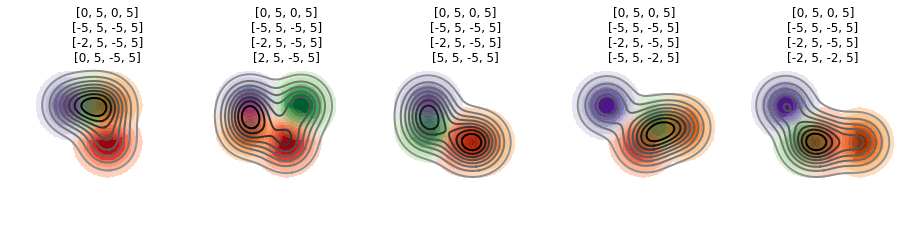

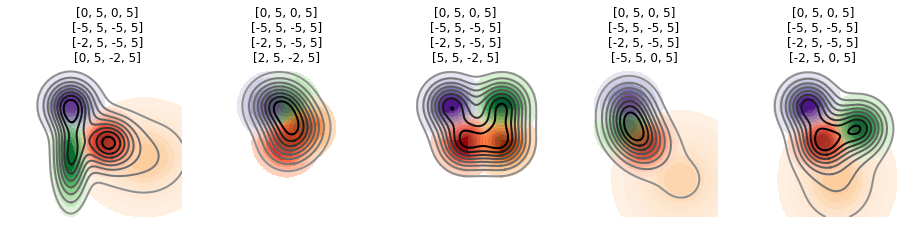

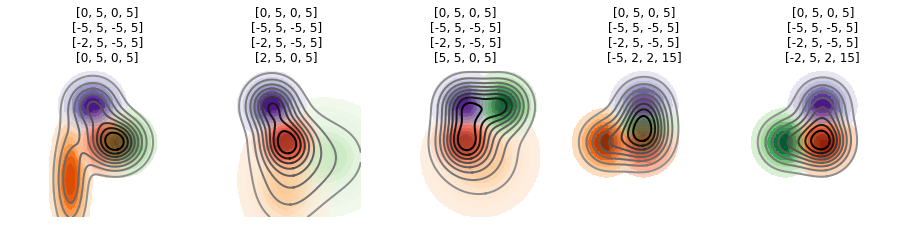

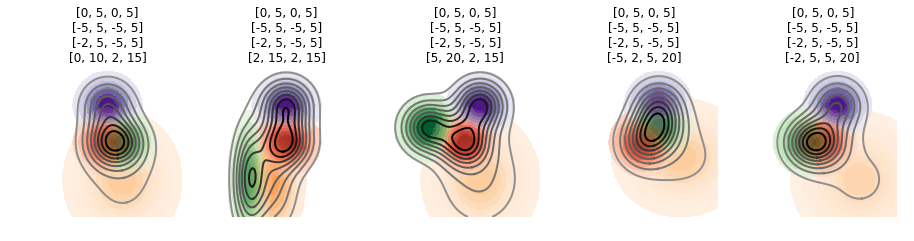

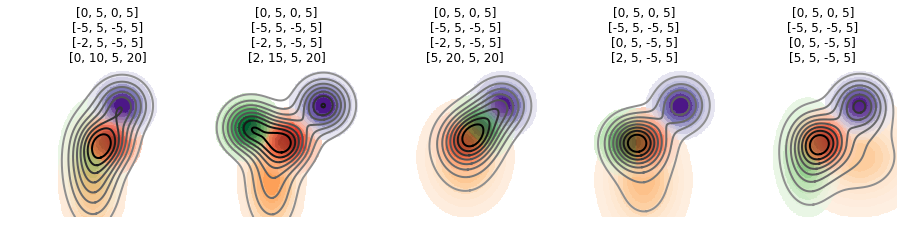

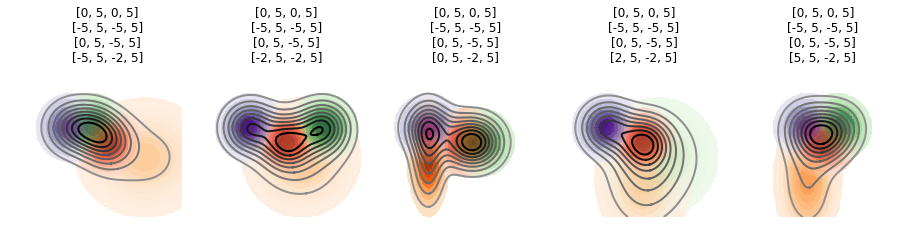

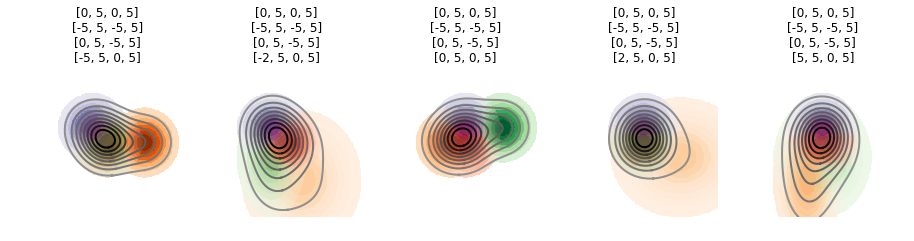

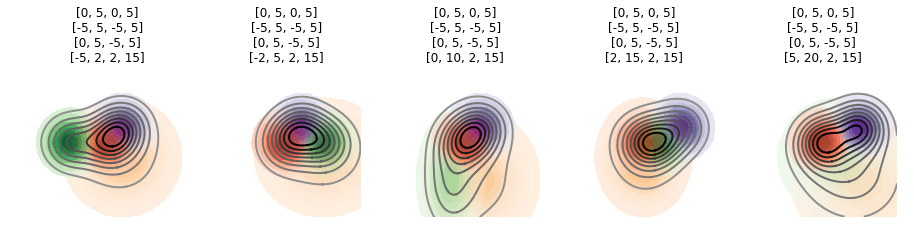

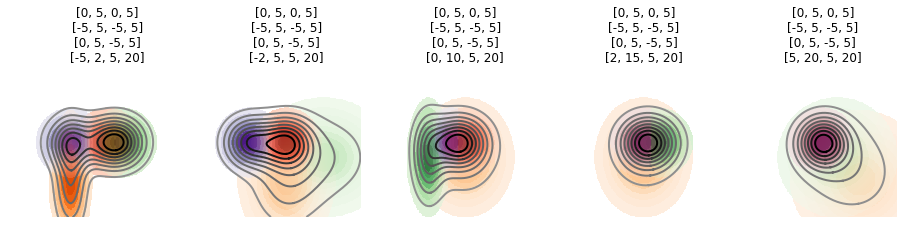

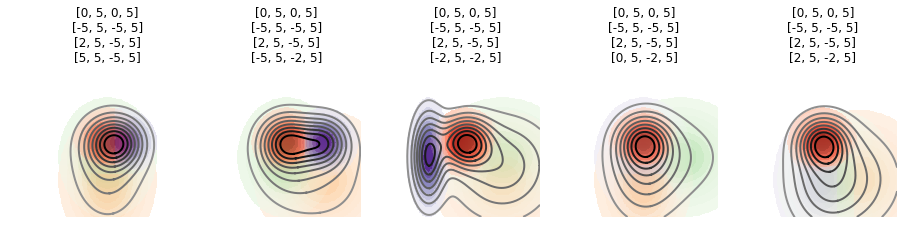

In [22]:
picture_worker.plot_images(images_4, gaussians_4, z_sums_4)

In [23]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
mu_x, mu_y = 0,0
variance_x, variance_y = 5,5

var_x, var_y = [2,5,10,15,20], [15,20]
gaussians_4d = []

for i,mu_y in enumerate([5,2,0,-2,-5]):
    for j,mu_x in enumerate([5,2,0,-2,-5]):
        if mu_y < 0:
            variance_y = var_y[i-3]
            variance_x = var_x[j]
        else: variance_x = 5
        gaussians_4d.append([x_min, x_max, y_min, y_max, mu_x, variance_x, mu_y, variance_y, size])

In [24]:
gaussians_4 = []
for i in range(len(gaussians_2d)):
    if i < math.ceil(len(gaussians_2d)/2):
        j = len(gaussians_2d)-i-1
    else:
        j = i-math.ceil(len(gaussians_2d)/2)
    gaussians_4.append([gaussian_static, gaussians_2d[i], gaussians_2d[j], gaussians_4d[i]])

In [25]:
images_4 = []
z_sums_4 = []
for i in range(len(gaussians_4)):
    z_list, image, z_sum = picture_worker.generate_image(gaussians_4[i], colorschemes, use_c_implementation=True, color_space ="lab")
    images_4.append(image)
    z_sums_4.append(z_sum)

['mu_x', 'variance_x', 'mu_y', 'variance_y']


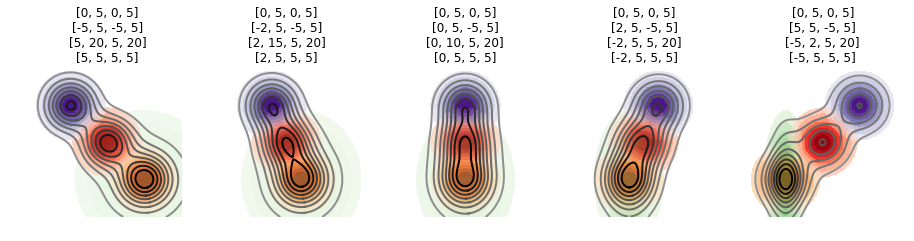

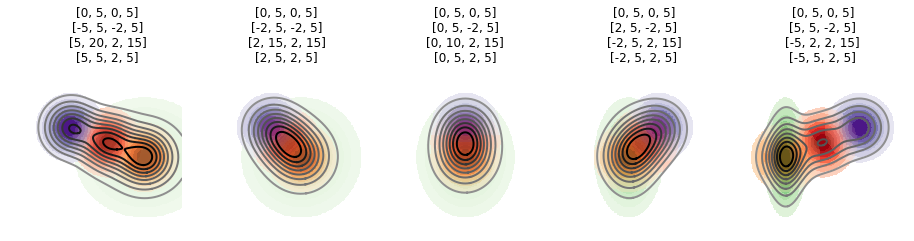

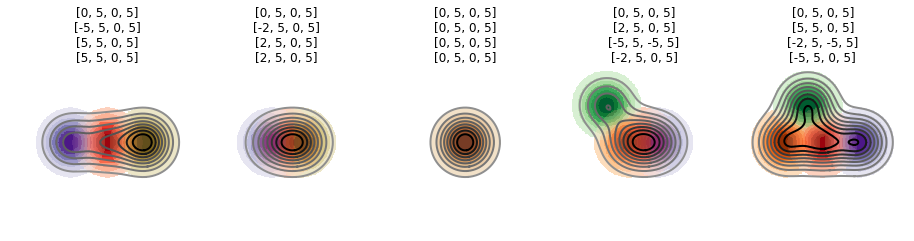

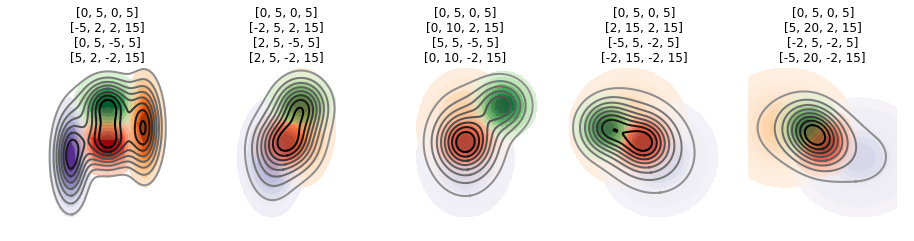

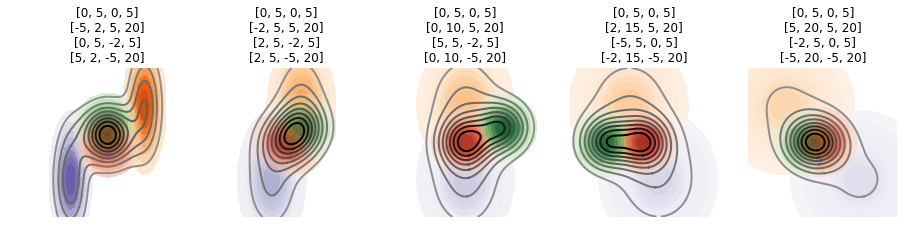

In [26]:
picture_worker.plot_images(images_4, gaussians_4, z_sums_4)

In [27]:
gaussians_5 = []
for i,j,k,l in it.combinations(range(len(gaussians_2d)),4):
    gaussians_5.append([gaussian_static, gaussians_2d[i], gaussians_2d[j], gaussians_2d[k], gaussians_2d[l]])

In [28]:
len(gaussians_5)

12650

In [29]:
### without c-implementation 217.48293161392212s elapsed size = 200
start = time.time()
images_5 = []
z_sums_5 = []
for i in np.linspace(0,len(gaussians_5)-1,dtype=int):
    z_list, image, z_sum = picture_worker.generate_image(gaussians_5[i], colorschemes, use_c_implementation=True, color_space ="lab")
    images_5.append(image)
    z_sums_5.append(z_sum)
end = time.time()
print("{}s elapsed".format(end-start))

68.86250519752502s elapsed


['mu_x', 'variance_x', 'mu_y', 'variance_y']


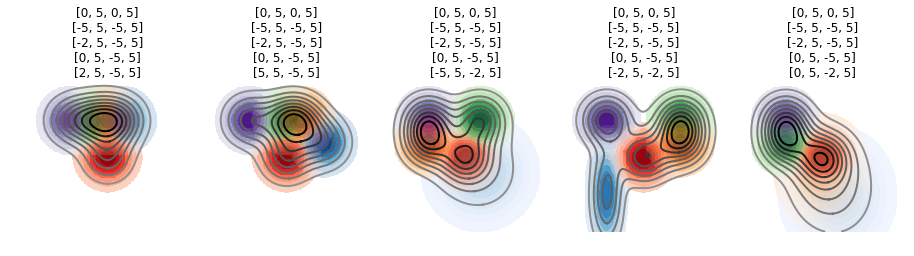

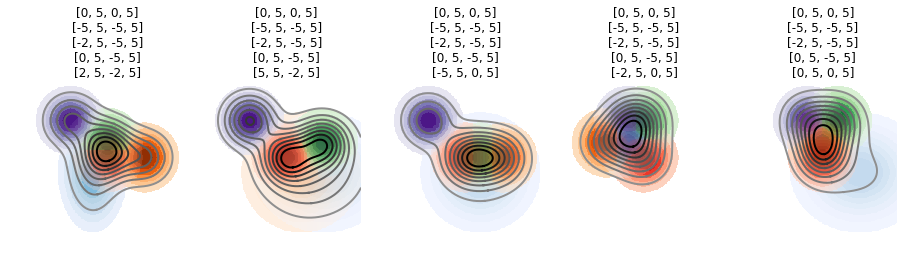

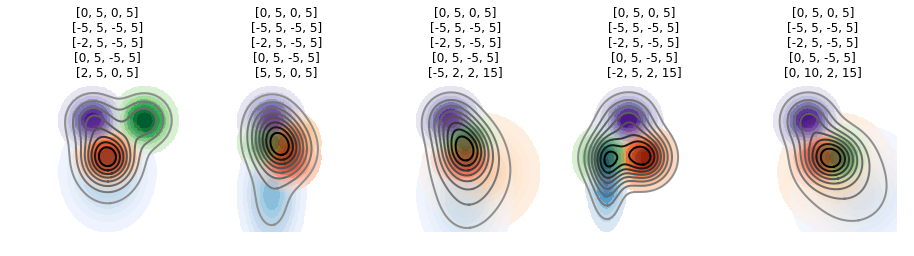

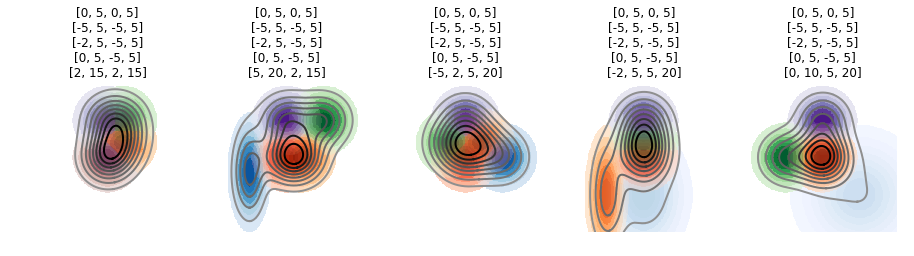

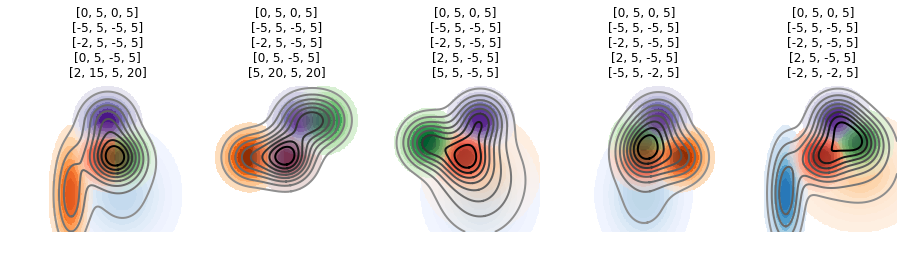

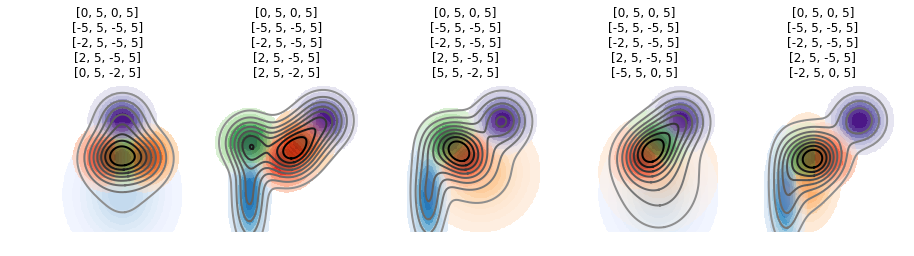

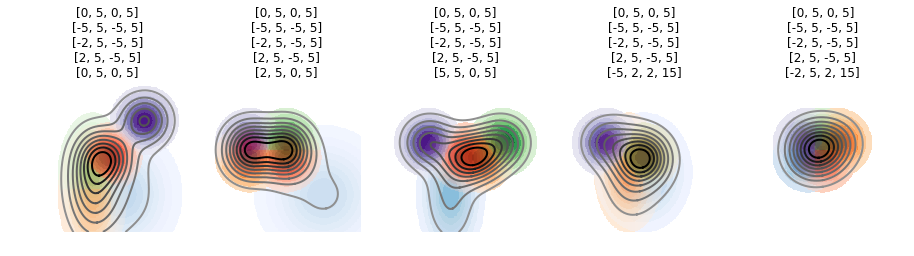

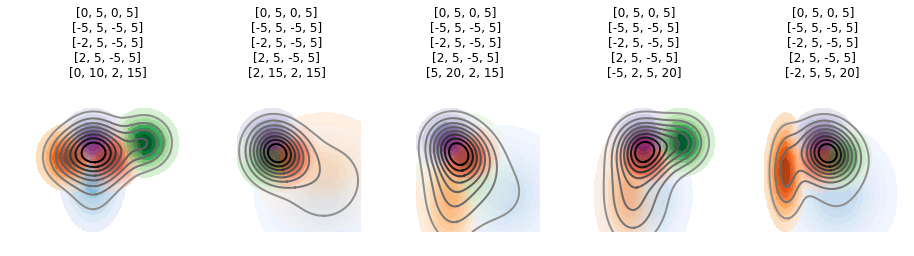

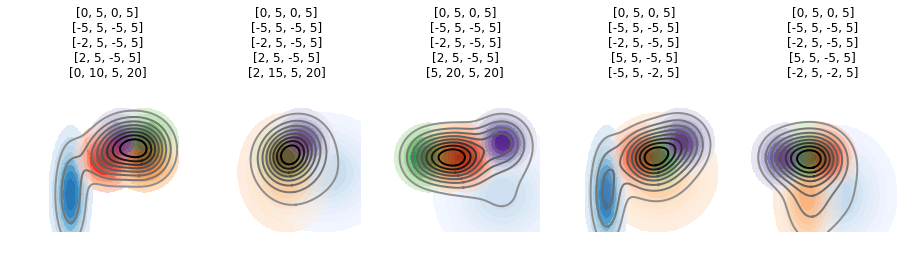

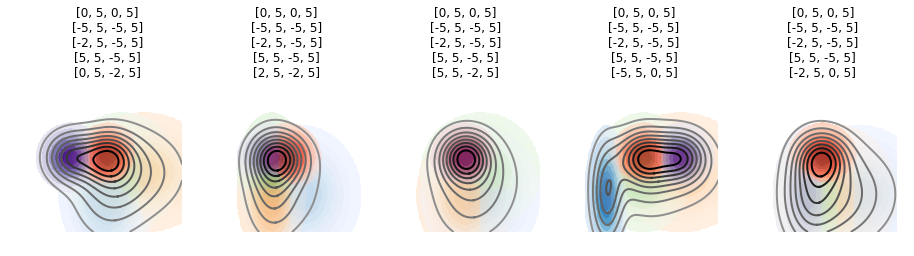

In [30]:
picture_worker.plot_images(images_5, gaussians_5, z_sums_5)